# Import packages

In [23]:
import pandas as pd
import ast
from geopy.distance import geodesic
from tqdm import tqdm
tqdm.pandas()
from sklearn.model_selection import train_test_split
import ml_help
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
plot_label="Volume"
GARDINER_LOCS_MIDDLE_POINT = (43.638933, -79.457196)

In [24]:
inci_df = pd.read_csv("../analysis/050_incidents/050_incidents.csv.zip")
inci_df["collectedAt"] = pd.to_datetime(inci_df["collectedAt"], utc=True)
inci_df["collectedAt"] = inci_df["collectedAt"].dt.floor(freq="t")
inci_df.head()

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- Rename close_to_gardiner_detector for future merge with count dataframe

In [25]:
inci_df.rename({"close_to_gardiner_detector": "detector_id"},inplace=True,axis=1)
inci_df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,detector_id
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...,...,...
31614,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
31615,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
31616,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
31617,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"[{'code': 101, 'description': 'Stopped traffic...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


In [26]:
inci_df["events"] = inci_df["events"].apply(lambda x: ast.literal_eval(x))
inci_df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,detector_id
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...,...,...
31614,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
31615,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
31616,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
31617,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"[{'code': 101, 'description': 'Stopped traffic...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- Break events in one new row per event

In [27]:
inci_df = inci_df.explode("events").reset_index()
inci_df.drop("index", axis=1, inplace=True)
inci_df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,detector_id
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
3,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
4,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...,...,...
40632,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
40633,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
40634,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
40635,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- I don't need "from" and "to" because I have already flagged each incident as being close to either Yonge and/or Gardiner

In [28]:
inci_df.drop(columns=["from","to"],inplace=True)
inci_df

,iconCategory,magnitudeOfDelay,length,delay,events,collectedAt,close_to_yonge_detector,detector_id
0,6.0,2.0,372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,7.0,0.0,302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
3,9.0,0.0,273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
4,7.0,0.0,254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...
40632,6.0,1.0,442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
40633,6.0,1.0,2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
40634,6.0,1.0,472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
40635,6.0,3.0,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- Getting event description from "events"

In [29]:
inci_df["event_description"] = inci_df["events"].apply(lambda x: x['description'])
inci_df

,iconCategory,magnitudeOfDelay,length,delay,events,collectedAt,close_to_yonge_detector,detector_id,event_description
0,6.0,2.0,372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic
1,7.0,0.0,302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed
2,7.0,0.0,302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks
3,9.0,0.0,273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks
4,7.0,0.0,254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed
...,...,...,...,...,...,...,...,...,...
40632,6.0,1.0,442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR,Slow traffic
40633,6.0,1.0,2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,Slow traffic
40634,6.0,1.0,472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Slow traffic
40635,6.0,3.0,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic


- Dropping "iconCategory" and "events" in favour of more detailed "event_description"

In [30]:
inci_df.drop(["iconCategory", "events"], axis=1, inplace=True)
inci_df

,magnitudeOfDelay,length,delay,collectedAt,close_to_yonge_detector,detector_id,event_description
0,2.0,372.918000,199.0,2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic
1,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed
2,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks
3,0.0,273.828235,0.0,2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks
4,0.0,254.244867,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed
...,...,...,...,...,...,...,...
40632,1.0,442.750186,165.0,2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR,Slow traffic
40633,1.0,2461.341117,127.0,2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,Slow traffic
40634,1.0,472.289662,158.0,2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Slow traffic
40635,3.0,432.591314,136.0,2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic


- Load Gardiner count data set

In [31]:
count_df = pd.read_csv("../../csv/v2/040_gardiner_count_processed.csv.zip")
count_df["datetime_bin"] = pd.to_datetime(count_df["datetime_bin"], utc=True)
count_df.rename({"datetime_bin": "collectedAt"},inplace=True,axis=1)
count_df["collectedAt"] = count_df["collectedAt"].dt.floor(freq="t")
count_df

,detector_id,collectedAt,volume_15min,number_of_lanes,primary_road,direction,latitude,longitude,detector_loc
0,DW0040DWG,2022-08-11 15:00:00+00:00,160,3,F G Gardiner Xy W,W,43.638046,-79.396634,W of SPADINA AV
1,DW0126DEG,2022-08-11 15:00:00+00:00,170,3,F G Gardiner Xy E,E,43.638420,-79.451353,W of RONCESVALLES AVE
2,DW0140DEG,2022-08-11 15:00:00+00:00,169,3,F G Gardiner Xy E,E,43.637296,-79.464739,E of ELLIS AVE
3,DW0140DWG,2022-08-11 15:00:00+00:00,123,3,F G Gardiner Xy W,W,43.637449,-79.464777,E of ELLIS AVE
4,DW0201DWG,2022-08-11 15:00:00+00:00,134,3,F G Gardiner Xy W,W,43.614486,-79.546012,At THE EAST MALL
...,...,...,...,...,...,...,...,...,...
145094,DW0201DEG,2023-01-01 05:15:00+00:00,98,3,F G Gardiner Xy E,E,43.614313,-79.545955,At THE EAST MALL
145095,DW0126DWG,2023-01-01 05:15:00+00:00,439,3,F G Gardiner Xy W,W,43.638420,-79.451353,E of PARKSIDE DRIVE
145096,DW0126DEG,2023-01-01 05:15:00+00:00,243,3,F G Gardiner Xy E,E,43.638420,-79.451353,W of RONCESVALLES AVE
145097,DW0151DWG,2023-01-01 05:15:00+00:00,365,5,F G Gardiner Xy W,W,43.631070,-79.475995,W of HUMBER RIVER (PALACE PIER)


- Add distance to middle point to count data set

In [32]:
def calculate_distance(coord):
    if GARDINER_LOCS_MIDDLE_POINT[1] > coord[1]:
        return -geodesic(GARDINER_LOCS_MIDDLE_POINT,coord).km
    return geodesic(GARDINER_LOCS_MIDDLE_POINT,coord).km

count_df["dist_from_mid_point"] = count_df.progress_apply(lambda x: calculate_distance((x["latitude"],x["longitude"])),axis=1)
count_df.head()

100%|█████████████████████████████████| 145099/145099 [00:17<00:00, 8532.50it/s]


,detector_id,collectedAt,volume_15min,number_of_lanes,primary_road,direction,latitude,longitude,detector_loc,dist_from_mid_point
0,DW0040DWG,2022-08-11 15:00:00+00:00,160,3,F G Gardiner Xy W,W,43.638046,-79.396634,W of SPADINA AV,4.887837
1,DW0126DEG,2022-08-11 15:00:00+00:00,170,3,F G Gardiner Xy E,E,43.638420,-79.451353,W of RONCESVALLES AVE,0.474912
2,DW0140DEG,2022-08-11 15:00:00+00:00,169,3,F G Gardiner Xy E,E,43.637296,-79.464739,E of ELLIS AVE,-0.635254
3,DW0140DWG,2022-08-11 15:00:00+00:00,123,3,F G Gardiner Xy W,W,43.637449,-79.464777,E of ELLIS AVE,-0.633557
4,DW0201DWG,2022-08-11 15:00:00+00:00,134,3,F G Gardiner Xy W,W,43.614486,-79.546012,At THE EAST MALL,-7.665465


- Drop unused columns

In [33]:
count_df.drop(["detector_loc", "primary_road", "latitude", "longitude"],inplace=True,axis=1)
count_df

,detector_id,collectedAt,volume_15min,number_of_lanes,direction,dist_from_mid_point
0,DW0040DWG,2022-08-11 15:00:00+00:00,160,3,W,4.887837
1,DW0126DEG,2022-08-11 15:00:00+00:00,170,3,E,0.474912
2,DW0140DEG,2022-08-11 15:00:00+00:00,169,3,E,-0.635254
3,DW0140DWG,2022-08-11 15:00:00+00:00,123,3,W,-0.633557
4,DW0201DWG,2022-08-11 15:00:00+00:00,134,3,W,-7.665465
...,...,...,...,...,...,...
145094,DW0201DEG,2023-01-01 05:15:00+00:00,98,3,E,-7.668009
145095,DW0126DWG,2023-01-01 05:15:00+00:00,439,3,W,0.474912
145096,DW0126DEG,2023-01-01 05:15:00+00:00,243,3,E,0.474912
145097,DW0151DWG,2023-01-01 05:15:00+00:00,365,5,W,-1.750579


- Merge incidents and data set with location and distance

In [34]:
count_inci_df = pd.merge(count_df, inci_df, on=["collectedAt", "detector_id"], how="left")
count_inci_df

,detector_id,collectedAt,volume_15min,number_of_lanes,direction,dist_from_mid_point,magnitudeOfDelay,length,delay,close_to_yonge_detector,event_description
0,DW0040DWG,2022-08-11 15:00:00+00:00,160,3,W,4.887837,NaN,NaN,NaN,NaN,NaN
1,DW0126DEG,2022-08-11 15:00:00+00:00,170,3,E,0.474912,NaN,NaN,NaN,NaN,NaN
2,DW0140DEG,2022-08-11 15:00:00+00:00,169,3,E,-0.635254,NaN,NaN,NaN,NaN,NaN
3,DW0140DWG,2022-08-11 15:00:00+00:00,123,3,W,-0.633557,NaN,NaN,NaN,NaN,NaN
4,DW0201DWG,2022-08-11 15:00:00+00:00,134,3,W,-7.665465,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
145236,DW0201DEG,2023-01-01 05:15:00+00:00,98,3,E,-7.668009,NaN,NaN,NaN,NaN,NaN
145237,DW0126DWG,2023-01-01 05:15:00+00:00,439,3,W,0.474912,NaN,NaN,NaN,NaN,NaN
145238,DW0126DEG,2023-01-01 05:15:00+00:00,243,3,E,0.474912,NaN,NaN,NaN,NaN,NaN
145239,DW0151DWG,2023-01-01 05:15:00+00:00,365,5,W,-1.750579,NaN,NaN,NaN,NaN,NaN


In [35]:
count_inci_df.drop_duplicates(inplace=True)
count_inci_df.drop("detector_id",inplace=True,axis=1)
count_inci_df = count_inci_df.reset_index()
count_inci_df = count_inci_df.drop("index",axis=1)
count_inci_df

,collectedAt,volume_15min,number_of_lanes,direction,dist_from_mid_point,magnitudeOfDelay,length,delay,close_to_yonge_detector,event_description
0,2022-08-11 15:00:00+00:00,160,3,W,4.887837,NaN,NaN,NaN,NaN,NaN
1,2022-08-11 15:00:00+00:00,170,3,E,0.474912,NaN,NaN,NaN,NaN,NaN
2,2022-08-11 15:00:00+00:00,169,3,E,-0.635254,NaN,NaN,NaN,NaN,NaN
3,2022-08-11 15:00:00+00:00,123,3,W,-0.633557,NaN,NaN,NaN,NaN,NaN
4,2022-08-11 15:00:00+00:00,134,3,W,-7.665465,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
145236,2023-01-01 05:15:00+00:00,98,3,E,-7.668009,NaN,NaN,NaN,NaN,NaN
145237,2023-01-01 05:15:00+00:00,439,3,W,0.474912,NaN,NaN,NaN,NaN,NaN
145238,2023-01-01 05:15:00+00:00,243,3,E,0.474912,NaN,NaN,NaN,NaN,NaN
145239,2023-01-01 05:15:00+00:00,365,5,W,-1.750579,NaN,NaN,NaN,NaN,NaN


- Drop close_to_yonge_detector because I am working with Gardiner locations

In [36]:
count_inci_df.drop("close_to_yonge_detector",inplace=True,axis=1)
count_inci_df

,collectedAt,volume_15min,number_of_lanes,direction,dist_from_mid_point,magnitudeOfDelay,length,delay,event_description
0,2022-08-11 15:00:00+00:00,160,3,W,4.887837,NaN,NaN,NaN,NaN
1,2022-08-11 15:00:00+00:00,170,3,E,0.474912,NaN,NaN,NaN,NaN
2,2022-08-11 15:00:00+00:00,169,3,E,-0.635254,NaN,NaN,NaN,NaN
3,2022-08-11 15:00:00+00:00,123,3,W,-0.633557,NaN,NaN,NaN,NaN
4,2022-08-11 15:00:00+00:00,134,3,W,-7.665465,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
145236,2023-01-01 05:15:00+00:00,98,3,E,-7.668009,NaN,NaN,NaN,NaN
145237,2023-01-01 05:15:00+00:00,439,3,W,0.474912,NaN,NaN,NaN,NaN
145238,2023-01-01 05:15:00+00:00,243,3,E,0.474912,NaN,NaN,NaN,NaN
145239,2023-01-01 05:15:00+00:00,365,5,W,-1.750579,NaN,NaN,NaN,NaN


- Load weather data set

In [37]:
weather_df = pd.read_csv("./data/weather_data.csv.zip")
weather_df.drop(['month', 'day', 'day_of_week', 'day_of_week_name', 'hour', 'minute'], axis=1, inplace=True)
weather_df["collectedAt"] = pd.to_datetime(weather_df["collectedAt"],utc=True)
weather_df["collectedAt"] = weather_df["collectedAt"].dt.floor(freq="t")
weather_df

,visibility,collectedAt,temperature,FeelsLike,humidity,windSpeed,windDegree,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,10.0,2022-07-14 12:45:00+00:00,18.69,18.68,79,2.57,340,0,0.0,0.0,0,1,0,0,0
1,10.0,2022-07-14 12:51:00+00:00,19.16,19.17,78,2.57,340,0,0.0,0.0,0,1,0,0,0
2,10.0,2022-07-14 12:55:00+00:00,19.16,19.17,78,2.57,340,0,0.0,0.0,0,1,0,0,0
3,10.0,2022-07-14 13:00:00+00:00,19.38,19.36,76,2.57,340,0,0.0,0.0,0,1,0,0,0
4,10.0,2022-07-14 13:05:00+00:00,19.42,19.40,76,2.57,340,0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73530,10.0,2023-03-26 21:35:00+00:00,9.77,6.07,41,9.26,290,0,0.0,0.0,0,1,0,0,0
73531,10.0,2023-03-26 21:40:00+00:00,9.77,6.07,41,9.26,290,0,0.0,0.0,0,1,0,0,0
73532,10.0,2023-03-26 21:45:00+00:00,9.64,5.90,40,9.26,290,0,0.0,0.0,0,1,0,0,0
73533,10.0,2023-03-26 21:50:00+00:00,9.61,5.86,40,9.26,290,0,0.0,0.0,0,1,0,0,0


- Merge weather data set with count and incidents

In [38]:
df = count_inci_df.merge(weather_df,on="collectedAt",how="left")
df

,collectedAt,volume_15min,number_of_lanes,direction,dist_from_mid_point,magnitudeOfDelay,length,delay,event_description,visibility,...,windSpeed,windDegree,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,2022-08-11 15:00:00+00:00,160,3,W,4.887837,NaN,NaN,NaN,NaN,10.0,...,7.72,320,0,0.0,0.0,0,1,0,0,0
1,2022-08-11 15:00:00+00:00,170,3,E,0.474912,NaN,NaN,NaN,NaN,10.0,...,7.72,320,0,0.0,0.0,0,1,0,0,0
2,2022-08-11 15:00:00+00:00,169,3,E,-0.635254,NaN,NaN,NaN,NaN,10.0,...,7.72,320,0,0.0,0.0,0,1,0,0,0
3,2022-08-11 15:00:00+00:00,123,3,W,-0.633557,NaN,NaN,NaN,NaN,10.0,...,7.72,320,0,0.0,0.0,0,1,0,0,0
4,2022-08-11 15:00:00+00:00,134,3,W,-7.665465,NaN,NaN,NaN,NaN,10.0,...,7.72,320,0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145236,2023-01-01 05:15:00+00:00,98,3,E,-7.668009,NaN,NaN,NaN,NaN,10.0,...,2.24,297,97,0.0,0.0,1,0,0,0,0
145237,2023-01-01 05:15:00+00:00,439,3,W,0.474912,NaN,NaN,NaN,NaN,10.0,...,2.24,297,97,0.0,0.0,1,0,0,0,0
145238,2023-01-01 05:15:00+00:00,243,3,E,0.474912,NaN,NaN,NaN,NaN,10.0,...,2.24,297,97,0.0,0.0,1,0,0,0,0
145239,2023-01-01 05:15:00+00:00,365,5,W,-1.750579,NaN,NaN,NaN,NaN,10.0,...,2.24,297,97,0.0,0.0,1,0,0,0,0


- Fill missing values

In [39]:
df["magnitudeOfDelay"].fillna(0,inplace=True)
df["length"].fillna(0,inplace=True)
df["delay"].fillna(0,inplace=True)
df["event_description"].fillna("No incidents",inplace=True)
df

,collectedAt,volume_15min,number_of_lanes,direction,dist_from_mid_point,magnitudeOfDelay,length,delay,event_description,visibility,...,windSpeed,windDegree,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,2022-08-11 15:00:00+00:00,160,3,W,4.887837,0.0,0.0,0.0,No incidents,10.0,...,7.72,320,0,0.0,0.0,0,1,0,0,0
1,2022-08-11 15:00:00+00:00,170,3,E,0.474912,0.0,0.0,0.0,No incidents,10.0,...,7.72,320,0,0.0,0.0,0,1,0,0,0
2,2022-08-11 15:00:00+00:00,169,3,E,-0.635254,0.0,0.0,0.0,No incidents,10.0,...,7.72,320,0,0.0,0.0,0,1,0,0,0
3,2022-08-11 15:00:00+00:00,123,3,W,-0.633557,0.0,0.0,0.0,No incidents,10.0,...,7.72,320,0,0.0,0.0,0,1,0,0,0
4,2022-08-11 15:00:00+00:00,134,3,W,-7.665465,0.0,0.0,0.0,No incidents,10.0,...,7.72,320,0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145236,2023-01-01 05:15:00+00:00,98,3,E,-7.668009,0.0,0.0,0.0,No incidents,10.0,...,2.24,297,97,0.0,0.0,1,0,0,0,0
145237,2023-01-01 05:15:00+00:00,439,3,W,0.474912,0.0,0.0,0.0,No incidents,10.0,...,2.24,297,97,0.0,0.0,1,0,0,0,0
145238,2023-01-01 05:15:00+00:00,243,3,E,0.474912,0.0,0.0,0.0,No incidents,10.0,...,2.24,297,97,0.0,0.0,1,0,0,0,0
145239,2023-01-01 05:15:00+00:00,365,5,W,-1.750579,0.0,0.0,0.0,No incidents,10.0,...,2.24,297,97,0.0,0.0,1,0,0,0,0


- Remove rows with missing weather data

In [40]:
df.dropna(inplace=True)
df

,collectedAt,volume_15min,number_of_lanes,direction,dist_from_mid_point,magnitudeOfDelay,length,delay,event_description,visibility,...,windSpeed,windDegree,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,2022-08-11 15:00:00+00:00,160,3,W,4.887837,0.0,0.0,0.0,No incidents,10.0,...,7.72,320,0,0.0,0.0,0,1,0,0,0
1,2022-08-11 15:00:00+00:00,170,3,E,0.474912,0.0,0.0,0.0,No incidents,10.0,...,7.72,320,0,0.0,0.0,0,1,0,0,0
2,2022-08-11 15:00:00+00:00,169,3,E,-0.635254,0.0,0.0,0.0,No incidents,10.0,...,7.72,320,0,0.0,0.0,0,1,0,0,0
3,2022-08-11 15:00:00+00:00,123,3,W,-0.633557,0.0,0.0,0.0,No incidents,10.0,...,7.72,320,0,0.0,0.0,0,1,0,0,0
4,2022-08-11 15:00:00+00:00,134,3,W,-7.665465,0.0,0.0,0.0,No incidents,10.0,...,7.72,320,0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145236,2023-01-01 05:15:00+00:00,98,3,E,-7.668009,0.0,0.0,0.0,No incidents,10.0,...,2.24,297,97,0.0,0.0,1,0,0,0,0
145237,2023-01-01 05:15:00+00:00,439,3,W,0.474912,0.0,0.0,0.0,No incidents,10.0,...,2.24,297,97,0.0,0.0,1,0,0,0,0
145238,2023-01-01 05:15:00+00:00,243,3,E,0.474912,0.0,0.0,0.0,No incidents,10.0,...,2.24,297,97,0.0,0.0,1,0,0,0,0
145239,2023-01-01 05:15:00+00:00,365,5,W,-1.750579,0.0,0.0,0.0,No incidents,10.0,...,2.24,297,97,0.0,0.0,1,0,0,0,0


- Expand collectedAt

In [41]:
df["month"] = df.collectedAt.dt.month_name()
df["day_of_week"] = df.collectedAt.dt.dayofweek
df["day"] = df.collectedAt.dt.day
df["hour"] = df.collectedAt.dt.hour
df["minute"] = df.collectedAt.dt.minute
df.drop("collectedAt",inplace=True,axis=1)
df

,volume_15min,number_of_lanes,direction,dist_from_mid_point,magnitudeOfDelay,length,delay,event_description,visibility,temperature,...,cloudy,clear,atmosphere,snowy,rainy,month,day_of_week,day,hour,minute
0,160,3,W,4.887837,0.0,0.0,0.0,No incidents,10.0,22.65,...,0,1,0,0,0,August,3,11,15,0
1,170,3,E,0.474912,0.0,0.0,0.0,No incidents,10.0,22.65,...,0,1,0,0,0,August,3,11,15,0
2,169,3,E,-0.635254,0.0,0.0,0.0,No incidents,10.0,22.65,...,0,1,0,0,0,August,3,11,15,0
3,123,3,W,-0.633557,0.0,0.0,0.0,No incidents,10.0,22.65,...,0,1,0,0,0,August,3,11,15,0
4,134,3,W,-7.665465,0.0,0.0,0.0,No incidents,10.0,22.65,...,0,1,0,0,0,August,3,11,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145236,98,3,E,-7.668009,0.0,0.0,0.0,No incidents,10.0,3.26,...,1,0,0,0,0,January,6,1,5,15
145237,439,3,W,0.474912,0.0,0.0,0.0,No incidents,10.0,3.26,...,1,0,0,0,0,January,6,1,5,15
145238,243,3,E,0.474912,0.0,0.0,0.0,No incidents,10.0,3.26,...,1,0,0,0,0,January,6,1,5,15
145239,365,5,W,-1.750579,0.0,0.0,0.0,No incidents,10.0,3.26,...,1,0,0,0,0,January,6,1,5,15


# Plot correlations
- Between speed, day of week, hour, magnitude of delay, length, delay

- Break collectedAt into needed fields

In [42]:
data_to_correlate = df[["volume_15min","day_of_week","hour","magnitudeOfDelay","length","delay","visibility","temperature","humidity","windSpeed","cloudsAll","rain1h","snow1h"]]
corr_mat = data_to_correlate.corr()

In [43]:
corr_mat

,volume_15min,day_of_week,hour,magnitudeOfDelay,length,delay,visibility,temperature,humidity,windSpeed,cloudsAll,rain1h,snow1h
volume_15min,1.000000,-0.029334,0.477777,-0.004978,0.000157,-0.002891,0.058717,0.143941,-0.099051,-0.110586,-0.038451,0.008402,-0.074658
day_of_week,-0.029334,1.000000,0.000327,0.005184,0.002611,0.007768,-0.078088,0.000663,-0.039955,-0.025958,-0.011831,0.031283,0.047010
hour,0.477777,0.000327,1.000000,0.037131,0.032292,0.028628,-0.012784,0.170252,-0.340568,0.054119,0.017082,0.018329,0.048255
magnitudeOfDelay,-0.004978,0.005184,0.037131,1.000000,0.687596,0.845088,-0.002000,0.018259,-0.027231,0.003920,-0.008697,0.006298,0.012444
length,0.000157,0.002611,0.032292,0.687596,1.000000,0.661936,-0.012325,0.012633,-0.018289,0.004889,-0.004082,0.008693,0.022912
delay,-0.002891,0.007768,0.028628,0.845088,0.661936,1.000000,0.002366,0.017266,-0.023729,0.001287,-0.011544,0.001990,0.000061
visibility,0.058717,-0.078088,-0.012784,-0.002000,-0.012325,0.002366,1.000000,0.173165,-0.223296,-0.132673,-0.165157,-0.262709,-0.423199
temperature,0.143941,0.000663,0.170252,0.018259,0.012633,0.017266,0.173165,1.000000,-0.240416,-0.365462,-0.183635,-0.021909,-0.228201
humidity,-0.099051,-0.039955,-0.340568,-0.027231,-0.018289,-0.023729,-0.223296,-0.240416,1.000000,-0.049957,0.338578,0.147579,0.056142
windSpeed,-0.110586,-0.025958,0.054119,0.003920,0.004889,0.001287,-0.132673,-0.365462,-0.049957,1.000000,0.132513,0.004478,0.279396


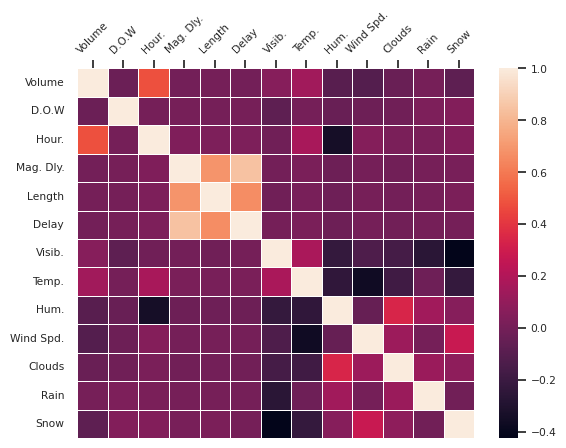

In [44]:
labels=["Volume", "D.O.W", "Hour.", "Mag. Dly.", "Length", "Delay", "Visib.", "Temp.", "Hum.", "Wind Spd.", "Clouds", "Rain", "Snow"]

sns.set(font_scale=0.7)
ax = sns.heatmap(corr_mat,linewidth=0.5,xticklabels=labels,yticklabels=labels)
ax.xaxis.tick_top()
plt.xticks(rotation=45)

plt.savefig("./plots/130_correlations.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/130_correlations.png", bbox_inches="tight")
plt.savefig("./plots/130_correlations.pdf", bbox_inches="tight")

- Drop unused cols

In [20]:
df.drop("windDegree", axis=1, inplace=True)
df

,volume_15min,number_of_lanes,direction,dist_from_mid_point,magnitudeOfDelay,length,delay,event_description,visibility,temperature,...,cloudy,clear,atmosphere,snowy,rainy,month,day_of_week,day,hour,minute
0,160,3,W,4.887837,0.0,0.0,0.0,No incidents,10.0,22.65,...,0,1,0,0,0,August,Thursday,11,15,0
1,170,3,E,0.474912,0.0,0.0,0.0,No incidents,10.0,22.65,...,0,1,0,0,0,August,Thursday,11,15,0
2,169,3,E,-0.635254,0.0,0.0,0.0,No incidents,10.0,22.65,...,0,1,0,0,0,August,Thursday,11,15,0
3,123,3,W,-0.633557,0.0,0.0,0.0,No incidents,10.0,22.65,...,0,1,0,0,0,August,Thursday,11,15,0
4,134,3,W,-7.665465,0.0,0.0,0.0,No incidents,10.0,22.65,...,0,1,0,0,0,August,Thursday,11,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145236,98,3,E,-7.668009,0.0,0.0,0.0,No incidents,10.0,3.26,...,1,0,0,0,0,January,Sunday,1,5,15
145237,439,3,W,0.474912,0.0,0.0,0.0,No incidents,10.0,3.26,...,1,0,0,0,0,January,Sunday,1,5,15
145238,243,3,E,0.474912,0.0,0.0,0.0,No incidents,10.0,3.26,...,1,0,0,0,0,January,Sunday,1,5,15
145239,365,5,W,-1.750579,0.0,0.0,0.0,No incidents,10.0,3.26,...,1,0,0,0,0,January,Sunday,1,5,15


# Onehot encode categorical attributes
- Also cast all fields to float32

In [23]:
categorical_attrs = ["direction","event_description", "month", "day_of_week"]

transformed_df = pd.get_dummies(df, columns=categorical_attrs, prefix="", prefix_sep="")
transformed_df = transformed_df.astype("float32")
transformed_df

,volume_15min,number_of_lanes,dist_from_mid_point,magnitudeOfDelay,length,delay,visibility,temperature,FeelsLike,humidity,...,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,160.0,3.0,4.887837,0.0,0.0,0.0,10.0,22.65,22.719999,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,170.0,3.0,0.474912,0.0,0.0,0.0,10.0,22.65,22.719999,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,169.0,3.0,-0.635254,0.0,0.0,0.0,10.0,22.65,22.719999,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,123.0,3.0,-0.633557,0.0,0.0,0.0,10.0,22.65,22.719999,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,134.0,3.0,-7.665465,0.0,0.0,0.0,10.0,22.65,22.719999,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145236,98.0,3.0,-7.668009,0.0,0.0,0.0,10.0,3.26,1.090000,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
145237,439.0,3.0,0.474912,0.0,0.0,0.0,10.0,3.26,1.090000,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
145238,243.0,3.0,0.474912,0.0,0.0,0.0,10.0,3.26,1.090000,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
145239,365.0,5.0,-1.750579,0.0,0.0,0.0,10.0,3.26,1.090000,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
transformed_df.rename({
    'number_of_lanes':"Num. Lanes",
    'dist_from_mid_point': "Dist. From Mid. Point",
    'magnitudeOfDelay': "Mag. of Delay",
    'length': "Length",
    'delay':"Delay",
    'visibility':"Visibility",
    'temperature':"Temperature",
    'FeelsLike': "Feels Like",
    'humidity': "Humidity",
    'windSpeed': "Wind Speed",
    'cloudsAll': "Clouds All",
    'rain1h': "Rain (1h)",
    'snow1h': "Snow (1h)",
    'cloudy': "Cloudy",
    'clear': "Clear",
    'atmosphere': "Atmosphere",
    'snowy': "Snowy",
    'rainy': "Rainy",
    'day': "Day",
    'hour': "Hour",
    'minute':"Minute"
}, axis=1, inplace=True)

In [26]:
transformed_df.to_csv("./data/gardiner_count_weather_incidents.csv.zip", index=False, compression="zip")